
# Classifier comparison

A comparison of several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


### KNeighborsClassifier

**How it Works**:
- K-Nearest Neighbors (KNN) classifies a sample based on the majority label among its k-nearest neighbors in the feature space. The algorithm finds the k-nearest points to the sample and assigns the class with the highest frequency among those points.

**Math Behind**:
- **Distance Calculation**: Typically uses Euclidean distance.
$\ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $
- **Classification**: The label is determined by the majority vote of the k-nearest neighbors.

**Main Args**:
- `n_neighbors`: Number of neighbors to use (default is 5).

**Advantages**:
- Simple and intuitive.
- Non-parametric and versatile.

**Disadvantages**:
- Computationally expensive with large datasets.
- Sensitive to the choice of k and distance metric.


### SVC (Support Vector Classifier) with Linear Kernel

**How it Works**:
- SVC with a linear kernel finds the hyperplane that best separates the classes in the feature space. It maximizes the margin between the support vectors of different classes.

**Math Behind**:
- **Objective Function**: Minimize the norm of the weights.
$\ \text{minimize} \ \frac{1}{2} ||w||^2 $
- **Decision Function**: The hyperplane is defined as:
$\ f(x) = w^T x + b $
- **Optimization Problem**: Solve for:
$\ \min_{w, b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b)) $

**Main Args**:
- `kernel`: Specifies the kernel type to be used in the algorithm (linear in this case).
- `C`: Regularization parameter.

**Advantages**:
- Effective in high-dimensional spaces.
- Works well when the number of features is greater than the number of samples.

**


### SVC (Support Vector Classifier) with RBF Kernel

**How it Works**:
- SVC with a Radial Basis Function (RBF) kernel maps the input features into a higher-dimensional space where a linear separator is found.

**Math Behind**:
- **RBF Kernel**: The kernel function is:
$\ K(x, y) = \exp(-\gamma ||x - y||^2) $
- **Objective Function**: Minimize the norm of the weights in the transformed space.
$\ \text{minimize} \ \frac{1}{2} ||w||^2 $
- **Decision Function**: The hyperplane in the transformed space is defined as:
$\ f(x) = \sum_{i=1}^{n} \alpha_i K(x_i, x) + b $
- **Optimization Problem**: Solve for:
$\ \min_{w, b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\sum_{j=1}^{n} \alpha_j K(x_j, x_i) + b)) $

**Main Args**:
- `kernel`: Specifies the kernel type to be used in the algorithm (RBF in this case).
- `C`: Regularization parameter.
- `gamma`: Kernel coefficient.

**Advantages**:
- Can handle non-linearly separable data.
- Powerful and flexible with proper tuning of parameters.

**Disadvantages**:
- Requires careful tuning of parameters (C and gamma).
- Computationally intensive for large datasets.


### GaussianProcessClassifier

**How it Works**:
- Gaussian Process Classifier (GPC) uses the properties of the Gaussian process to define a distribution over functions and make predictions based on the observed data.

**Math Behind**:
- **Gaussian Process**: Defines a distribution over functions:
$\ f(x) \sim \mathcal{GP}(m(x), k(x, x')) $
- **Mean Function**:
$\ m(x) = \mathbb{E}[f(x)] $
- **Covariance Function (Kernel)**:
$\ k(x, x') = \mathbb{E}[(f(x) - m(x))(f(x') - m(x'))] $
- **Prediction**: Given the training data, the posterior distribution for new inputs is:
$\ p(f_*|X, y, X_*) \sim \mathcal{N}(\bar{f}_*, \text{cov}(f_*)) $

**Main Args**:
- `kernel`: The kernel specifying the covariance function of the GP.
- `random_state`: Controls the randomness of the estimator.

**Advantages**:
- Provides probabilistic predictions.
- Can model uncertainty in predictions.

**Disadvantages**:
- Computationally expensive for large datasets.
- Requires careful choice of the kernel.


### DecisionTreeClassifier

**How it Works**:
- Decision Tree Classifier builds a tree structure where each node represents a decision based on a feature, and each leaf node represents a class label. The algorithm recursively splits the data based on the feature that provides the highest information gain.

**Math Behind**:
- **Information Gain**:
$\ \text{IG}(D_p, f) = \text{H}(D_p) - \sum_{v \in \text{values}(f)} \frac{|D_v|}{|D_p|} \text{H}(D_v) $
- **Entropy**:
$\ \text{H}(D) = - \sum_{c=1}^{C} p(c) \log_2 p(c) $

**Main Args**:
- `max_depth`: The maximum depth of the tree.

**Advantages**:
- Simple to understand and interpret.
- Can handle both numerical and categorical data.

**Disadvantages**:
- Prone to overfitting.
- Can be unstable due to small variations in the data.


### RandomForestClassifier

**How it Works**:
- Random Forest Classifier is an ensemble method that creates multiple decision trees using random subsets of the data and features. The final prediction is made by averaging the predictions of all individual trees (for regression) or by majority voting (for classification).

**Math Behind**:
- **Bootstrap Sampling**: Randomly sample with replacement from the training data to create multiple datasets.
- **Decision Trees**: Build a decision tree for each sampled dataset.
- **Aggregation**: Combine the predictions of all trees.
$\ \hat{f}(x) = \frac{1}{T} \sum_{t=1}^{T} f_t(x) $

**Main Args**:
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of the trees.
- `max_features`: Number of features to consider when looking for the best split.

**Advantages**:
- Reduces overfitting by averaging multiple trees.
- Handles large datasets well.

**Disadvantages**:
- Can be computationally intensive.
- Less interpretable than a single decision tree.


### MLPClassifier

**How it Works**:
- Multi-Layer Perceptron (MLP) Classifier is a type of neural network that consists of multiple layers of nodes. Each node represents a neuron with an activation function. The network is trained using backpropagation to minimize the prediction error.

**Math Behind**:
- **Forward Pass**: Computes the output of the network.
$\ a^{(l)} = \sigma(W^{(l)} a^{(l-1)} + b^{(l)}) $
- **Backward Pass**: Updates the weights using gradient descent.
$\ \Delta W^{(l)} = \eta \frac{\partial L}{\partial W^{(l)}} $
- **Loss Function**: Commonly uses cross-entropy loss.
$\ L(y, \hat{y}) = - \sum_{i=1}^{n} y_i \log(\hat{y}_i) $

**Main Args**:
- `alpha`: L2 regularization term.
- `max_iter`: Maximum number of iterations.

**Advantages**:
- Can model complex non-linear relationships.
- Flexible architecture.

**Disadvantages**:
- Requires careful tuning of hyperparameters.
- Prone to overfitting if not properly regularized.


### Quadratic Discriminant Analysis (QDA)

**How it Works**:
- QDA is a classifier that assumes that each class follows a Gaussian distribution with its own covariance matrix. It uses Bayes' theorem to compute the posterior probabilities and assigns the class with the highest probability.

**Math Behind**:
- **Discriminant Function**:
$\ \delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k $
- **Classification**:
$\ \hat{y} = \arg \max_k \delta_k(x) $

**Main Args**:
- No major hyperparameters to tune.

**Advantages**:
- Works well with data that follows a Gaussian distribution.
- Can model the variance of each class separately.

**Disadvantages**:
- Assumes that the covariance matrices of the features are different for each class, which might not be the case in practice.
- Sensitive to outliers.


### AdaBoostClassifier

**How it Works**:
- AdaBoost (Adaptive Boosting) combines multiple weak classifiers to form a strong classifier. Each classifier is trained on the data, and more weight is given to misclassified points in subsequent rounds. This iterative process continues until a specified number of classifiers have been added or the training error is minimized.

**Math Behind**:
- **Weighted Error**:
$\ \epsilon_t = \sum_{i=1}^{n} w_i I(y_i \neq h_t(x_i)) $
- **Classifier Weight**:
$\ \alpha_t = \log \left(\frac{1 - \epsilon_t}{\epsilon_t}\right) $
- **Weight Update**:
$\ w_{i}^{(t+1)} = w_i^{(t)} \exp(\alpha_t I(y_i \neq h_t(x_i))) $
- **Final Hypothesis**:
$\ H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right) $

**Main Args**:
- `algorithm`: Algorithm to use ('SAMME' or 'SAMME.R').
- `random_state`: Controls the randomness of the estimator.
- `n_estimators`: The maximum number of estimators at which boosting is terminated.
- `learning_rate`: Weight applied to each classifier at each boosting iteration.

**Advantages**:
- Can significantly improve the performance of weak classifiers.
- Effective with various types of classifiers.
- Reduces both bias and variance.

**Disadvantages**:
- Sensitive to noisy data and outliers.
- Can be computationally intensive.


### GaussianNB

**How it Works**:
- Gaussian Naive Bayes assumes that the features follow a normal distribution. It uses Bayes' theorem to compute the probability of each class and predicts the class with the highest posterior probability.

**Math Behind**:
- **Likelihood**:
$\ P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2 \sigma_y^2}\right) $
- **Posterior Probability**:
$\ P(y|x) = \frac{P(x|y)P(y)}{P(x)} $
- **Classification**:
$\ \hat{y} = \arg \max_y P(y|x) $

**Main Args**:
- No major hyperparameters to tune.

**Advantages**:
- Simple and fast.
- Works well with small datasets.
- Handles continuous features well by assuming a Gaussian distribution.

**Disadvantages**:
- Assumes feature independence (naive assumption).
- Can perform poorly if this assumption is not true.
- Sensitive to the accuracy of the normality assumption for the features.


### Linear Discriminant Analysis (LDA)

**How it Works**:
- Linear Discriminant Analysis (LDA) is a classifier that assumes that the data for each class is normally distributed with a common covariance matrix. It finds the linear combinations of features that best separate the classes.

**Math Behind**:
- **Discriminant Function**:
$\ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k $
- **Classification**:
$\ \hat{y} = \arg \max_k \delta_k(x) $
- **Covariance Matrix**:
$\ \Sigma = \frac{1}{n - K} \sum_{k=1}^{K} \sum_{i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T $

**Main Args**:
- `solver`: The solver to use for the computation (e.g., 'svd', 'lsqr', 'eigen').
- `shrinkage`: Shrinkage parameter for regularization (e.g., 'auto', None, a float).

**Advantages**:
- Works well with data that follows a Gaussian distribution.
- Can handle multi-class classification.
- Provides linear decision boundaries which are easy to interpret.

**Disadvantages**:
- Assumes normality and homoscedasticity (equal class covariances).
- Sensitive to outliers.
- Assumes linear separation between classes which might not be suitable for complex datasets.


In [7]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=1, random_state=1, n_clusters_per_class=1
)


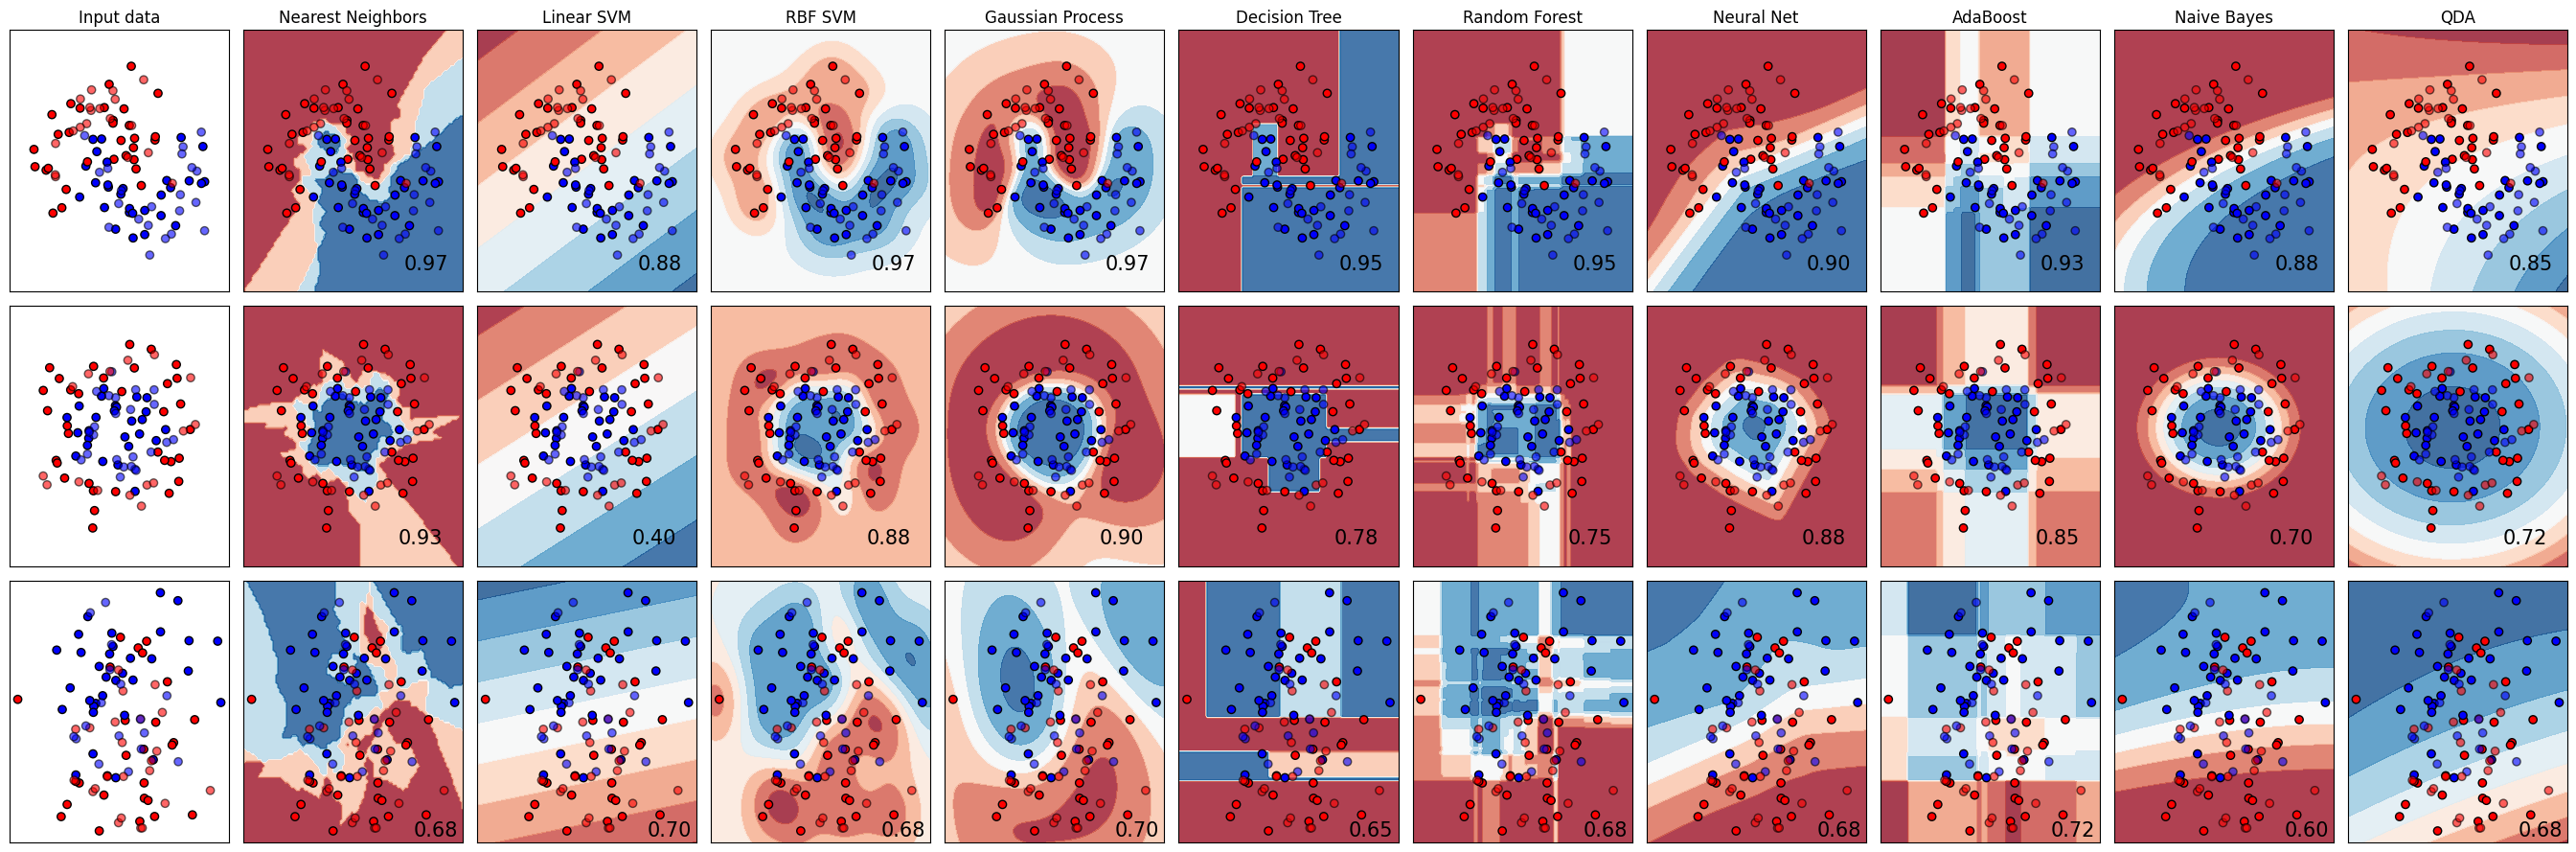

In [11]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()